In [1]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [3]:
import tensorflow as tf
tf.contrib.rnn.BasicLSTMCell(5)

In [4]:
print (mnist.train.images.shape)
print (mnist.train.labels.shape)
print (mnist.test.labels.shape)

(55000, 784)
(55000, 10)
(10000, 10)


In [5]:
import tensorflow as tf
from tensorflow.contrib import rnn

#import mnist dataset
# from tensorflow.examples.tutorials.mnist import input_data
# mnist=input_data.read_data_sets("/tmp/data/",one_hot=True)

#define constants
#unrolled through 28 time steps
time_steps=28
#hidden LSTM units
num_units=128
#rows of 28 pixels
n_input=28
#learning rate for adam
learning_rate=0.001
#mnist is meant to be classified in 10 classes(0-9).
n_classes=10
#size of batch
batch_size=128

In [6]:
#weights and biases of appropriate shape to accomplish above task
out_weights=tf.Variable(tf.random_normal([num_units,n_classes]))
out_bias=tf.Variable(tf.random_normal([n_classes]))

#defining placeholders
#input image placeholder
x=tf.placeholder("float",[None,time_steps,n_input])
#input label placeholder
y=tf.placeholder("float",[None,n_classes])

In [7]:
#processing the input tensor from [batch_size,n_steps,n_input] to "time_steps" number of [batch_size,n_input] tensors
input=tf.unstack(x ,time_steps,1)

In [8]:
#defining the network
lstm_layer=rnn.BasicLSTMCell(num_units,forget_bias=1)
outputs,_=rnn.static_rnn(lstm_layer,input,dtype="float32")
#converting last output of dimension [batch_size,num_units] to [batch_size,n_classes] by out_weight multiplication
prediction=tf.matmul(outputs[-1],out_weights)+out_bias
#loss_function
loss=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=prediction,labels=y))
#optimization
opt=tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)

#model evaluation
correct_prediction=tf.equal(tf.argmax(prediction,1),tf.argmax(y,1))
accuracy=tf.reduce_mean(tf.cast(correct_prediction,tf.float32))



In [15]:
#initialize variables
init=tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
iter=1
while iter<100:
    batch_x,batch_y=mnist.train.next_batch(batch_size=batch_size)

    batch_x=batch_x.reshape((batch_size,time_steps,n_input))

    sess.run(opt, feed_dict={x: batch_x, y: batch_y})

    if iter %10==0:
        acc=sess.run(accuracy,feed_dict={x:batch_x,y:batch_y})
        los=sess.run(loss,feed_dict={x:batch_x,y:batch_y})
        print("For iter ",iter)
        print("Accuracy ",acc)
        print("Loss ",los)
        print("__________________")

    iter=iter+1
        
#calculating test accuracy
test_data = mnist.test.images[:128].reshape((-1, time_steps, n_input))
test_label = mnist.test.labels[:128]
print("Testing Accuracy:", sess.run(accuracy, feed_dict={x: test_data, y: test_label}))

For iter  10
Accuracy  0.390625
Loss  1.88522
__________________
For iter  20
Accuracy  0.523438
Loss  1.41631
__________________
For iter  30
Accuracy  0.554688
Loss  1.44917
__________________
For iter  40
Accuracy  0.695312
Loss  0.941488
__________________
For iter  50
Accuracy  0.6875
Loss  0.911465
__________________
For iter  60
Accuracy  0.765625
Loss  0.710968
__________________
For iter  70
Accuracy  0.765625
Loss  0.757579
__________________
For iter  80
Accuracy  0.851562
Loss  0.501476
__________________
For iter  90
Accuracy  0.851562
Loss  0.470517
__________________
Testing Accuracy: 0.875


4


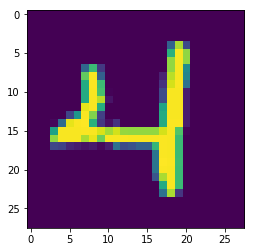

In [24]:
from matplotlib import pyplot as plt
plt.clf()
plt.cla()
plt.close()
import numpy as np
def gen_image(arr):
    two_d = (np.reshape(arr,(28,28))*255).astype(np.uint8)
    plt.imshow(two_d,interpolation='nearest')
    return plt

print (np.argmax(mnist.test.labels[103]))
gen_image(mnist.test.images[103]).show()

In [22]:
print (np.argmax(mnist.test.labels[100:130],axis=1))

[6 0 5 4 9 9 2 1 9 4 8 7 3 9 7 4 4 4 9 2 5 4 7 6 7 9 0 5 8 5]
